In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Loading the model

In [ ]:
cnn= tf.keras.models.load_model("/content/trained_model.h5")

visualisation Performing prediction on single image

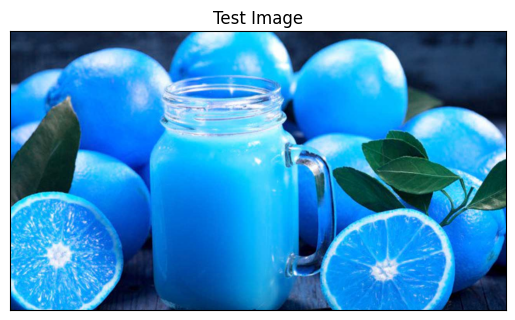

In [ ]:
import cv2
image_path = "/content/test/orange/Image_2.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image= tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting single image into batch
predictions = cnn.predict(input_arr)


1/1 [==============================] - 0s 29ms/step


In [ ]:
print(predictions)

[[2.3811515e-30 1.4293492e-31 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0323024e-30 0.0000000e+00 6.3283828e-27 1.0939215e-27
  0.0000000e+00 0.0000000e+00 1.3091181e-34 0.0000000e+00 4.8565314e-33
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9639971e-27
  3.9194339e-31 1.0000000e+00 0.0000000e+00 3.5246686e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0525278e-27 0.0000000e+00 3.6154975e-36
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.0562035e-35]]


In [ ]:
!pip install kaggle

**Uploading the kaggle.json file**

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#using API to fetch the dataset from Kaggle
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 1.97G/1.98G [00:32<00:00, 112MB/s]
100% 1.98G/1.98G [00:33<00:00, 64.5MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/fruit-and-vegetable-image-recognition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
test_set =tf.keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    )


Found 359 files belonging to 36 classes.


In [ ]:
result_index = np.where(predictions[0]== max(predictions[0]))
index = result_index[0][0]
print(index)

21


In [ ]:
test_class_names = test_set.class_names
#perform a single prediction
print("it is  ", test_class_names[index])

it is   orange
